Name: Wenhao Wu

Student ID: 1304952

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


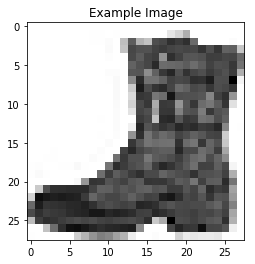

9


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

exampleindex = 150
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.title('Example Image')
plt.show()
print(digitlabel)

In [3]:
x_train = x_train.reshape(-1, 28*28) #Rank3 to Rank2
x_train = x_train.astype('float32') / 255.0 #Input normalization, rgb(255,255,255) is black
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255.0
 
y_train = keras.utils.to_categorical(y_train) #Prepare for outputs of logical regression
y_test = keras.utils.to_categorical(y_test)

Above cell is to pre process the data before training

In [4]:
one_layer_model = keras.models.Sequential()
one_layer_model.add(keras.layers.Dense(10, input_shape=(28 * 28,), activation='softmax'))
one_layer_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

one_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Use a single layer model first to to check how accurate it can reach

In [5]:
hist = one_layer_model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.9800 - acc: 0.6988 - val_loss: 0.7474 - val_acc: 0.7518
Epoch 2/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.6731 - acc: 0.7847 - val_loss: 0.6529 - val_acc: 0.7838
Epoch 3/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.6077 - acc: 0.8035 - val_loss: 0.6100 - val_acc: 0.7980
Epoch 4/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.5718 - acc: 0.8141 - val_loss: 0.5836 - val_acc: 0.8066
Epoch 5/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.5486 - acc: 0.8199 - val_loss: 0.5651 - val_acc: 0.8110
Epoch 6/30
60000/60000 [==============================] - 1s 24us/step - loss: 0.5318 - acc: 0.8255 - val_loss: 0.5518 - val_acc: 0.8172
Epoch 7/30
60000/60000 [==============================] - 1s 25us/step - loss: 0.5189 - acc: 0.8293 - val_loss: 0.5427 - val_acc

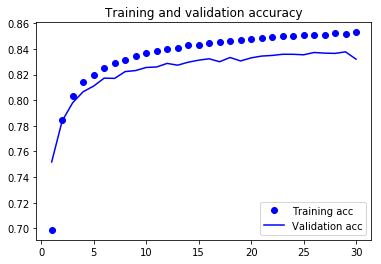

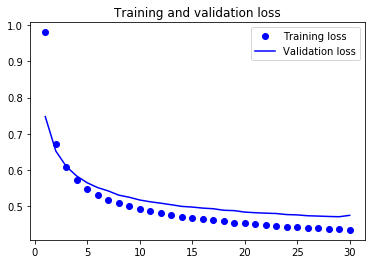

In [6]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

From the validation acc line, the over all accurancy is somewhere near 83%

In [19]:
multi_layer_model = keras.models.Sequential()
multi_layer_model.add(keras.layers.Dense(100, input_shape=(28 * 28,), activation='relu'))
#multi_layer_model.add(keras.layers.Dense(100, activation='relu'))
#multi_layer_model.add(keras.layers.Dense(100, activation='relu'))
multi_layer_model.add(keras.layers.Dense(50, activation='relu'))
multi_layer_model.add(keras.layers.Dense(50, activation='relu'))
multi_layer_model.add(keras.layers.Dense(25, activation='relu'))
multi_layer_model.add(keras.layers.Dense(25, activation='relu'))
multi_layer_model.add(keras.layers.Dense(10, activation='softmax'))

multi_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_19 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_20 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_21 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_22 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                260       
Total params: 88,285
Trainable params: 88,285
Non-trainable params: 0
_________________________________________________________________


In [20]:
multi_layer_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist1 = multi_layer_model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 52us/step - loss: 1.1996 - acc: 0.5717 - val_loss: 0.7616 - val_acc: 0.6945
Epoch 2/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.6669 - acc: 0.7568 - val_loss: 0.5919 - val_acc: 0.7995
Epoch 3/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.5409 - acc: 0.8118 - val_loss: 0.5398 - val_acc: 0.8135
Epoch 4/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.4831 - acc: 0.8306 - val_loss: 0.4888 - val_acc: 0.8255
Epoch 5/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.4490 - acc: 0.8409 - val_loss: 0.4806 - val_acc: 0.8297
Epoch 6/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.4264 - acc: 0.8491 - val_loss: 0.4605 - val_acc: 0.8360
Epoch 7/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.4071 - acc: 0.8560 - val_loss: 0.4452 - val_acc

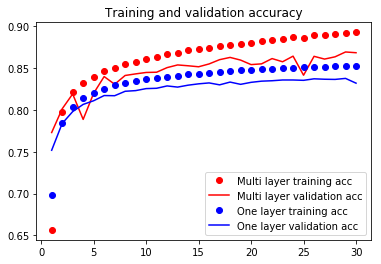

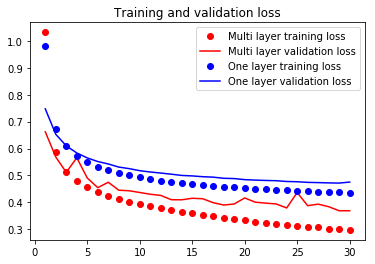

In [18]:
acc1 = hist1.history['acc']
val_acc1 = hist1.history['val_acc']
loss1 = hist1.history['loss']
val_loss1 = hist1.history['val_loss']
epochs1 = range(1, len(acc) + 1)

import matplotlib.pyplot as plt

plt.plot(epochs1, acc1, 'ro', label='Multi layer training acc')
plt.plot(epochs1, val_acc1, 'r', label='Multi layer validation acc')
plt.plot(epochs, acc, 'bo', label='One layer training acc')
plt.plot(epochs, val_acc, 'b', label='One layer validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs1, loss1, 'ro', label='Multi layer training loss')
plt.plot(epochs1, val_loss1, 'r', label='Multi layer validation loss')
plt.plot(epochs, loss, 'bo', label='One layer training loss')
plt.plot(epochs, val_loss, 'b', label='One layer validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

From the above graph, seems like there is some over fitting happenging, but the overall accurancy has improved a bit to 85%. Having more layers does not increase the accurancy dramatically. In order to acchive 95% or even more, some special model, such as MobileNet should be used.